# Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt

# Data Set Match Scores

#### Load the dataset match scores

In [2]:
match_scores = pd.read_csv('match_scores_2017_unindexed_csv.csv')

#### Info about the dataset match scores

This dataset have matches from different tournaments in 2017.

In [3]:
match_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3830 entries, 0 to 3829
Data columns (total 24 columns):
tourney_year_id           3830 non-null object
tourney_order             3830 non-null int64
tourney_slug              3830 non-null object
tourney_url_suffix        3830 non-null object
tourney_round_name        3830 non-null object
round_order               3830 non-null int64
match_order               3830 non-null int64
winner_name               3830 non-null object
winner_player_id          3830 non-null object
winner_slug               3830 non-null object
loser_name                3830 non-null object
loser_player_id           3830 non-null object
loser_slug                3830 non-null object
winner_seed               2480 non-null object
loser_seed                2066 non-null object
match_score_tiebreaks     3830 non-null object
winner_sets_won           3830 non-null int64
loser_sets_won            3830 non-null int64
winner_games_won          3830 non-null int64
loser_

In [4]:
match_scores.head()

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Finals,1,1,Grigor Dimitrov,d875,grigor-dimitrov,...,3,62 26 63,2,1,14,11,0,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats
1,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,1,Grigor Dimitrov,d875,grigor-dimitrov,...,1,76(7) 62,2,0,13,8,1,0,2017-339-d875-r975,/en/scores/2017/339/MS002/match-stats
2,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,2,Kei Nishikori,n552,kei-nishikori,...,2,76(3) 63,2,0,13,9,1,0,2017-339-n552-w367,/en/scores/2017/339/MS003/match-stats
3,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Quarter-Finals,3,1,Milos Raonic,r975,milos-raonic,...,5,46 63 64,2,1,16,13,0,0,2017-339-r975-n409,/en/scores/2017/339/MS004/match-stats
4,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Quarter-Finals,3,2,Stan Wawrinka,w367,stan-wawrinka,...,NaN,67(2) 64 64,2,1,18,15,0,1,2017-339-w367-e831,/en/scores/2017/339/MS007/match-stats


In [5]:
match_scores.loc[0]

tourney_year_id                                               2017-339
tourney_order                                                        1
tourney_slug                                                  brisbane
tourney_url_suffix        /en/scores/archive/brisbane/339/2017/results
tourney_round_name                                              Finals
round_order                                                          1
match_order                                                          1
winner_name                                            Grigor Dimitrov
winner_player_id                                                  d875
winner_slug                                            grigor-dimitrov
loser_name                                               Kei Nishikori
loser_player_id                                                   n552
loser_slug                                               kei-nishikori
winner_seed                                                          7
loser_

#### Visualizing the dataset

Here we display the number of matches of each tournament with a interactive widget 

In [6]:
tourney_matches = match_scores[['tourney_slug','match_id']].groupby('tourney_slug',as_index=False).count()
tourney_matches.sort_values('match_id', inplace=True)


def explore(n): 
    display(tourney_matches.head(n))

def fig_show(n):
    fig = go.Figure(data=[go.Bar(
                x=tourney_matches['match_id'].tail(n),
                y=tourney_matches['tourney_slug'].tail(n), 
                orientation = 'h'
            )])
    fig.update_layout(title_text='Number of matches by tournament')

    fig.show()
    
_ = interact(fig_show, n = (10,tourney_matches.shape[0]))

interactive(children=(IntSlider(value=38, description='n', max=67, min=10), Output()), _dom_classes=('widget-i…

Number of players that win more than one tournament

In [7]:
tourney_finals = match_scores[match_scores['tourney_round_name'] == 'Finals']
tourney_finals_winner = tourney_finals['winner_name'].value_counts()[tourney_finals['winner_name'].value_counts() > 1]
labels = tourney_finals_winner.index
values = tourney_finals_winner

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(title={
                    'text': "Tournaments won by player 2017 (>2)",
                    'font': { 
                        'size' : 20
                    },
                    'position': 'top center'
                    },
                  hoverinfo='label+percent', 
                  textinfo='value', 
                  textfont_size=20)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

Players that play more finals

In [8]:
tourney_finals = match_scores[match_scores['tourney_round_name'] == 'Finals']
dit_finals ={}

for i in tourney_finals['winner_name']:
    if i not in dit_finals:
        dit_finals[i] = 1
    else:
        dit_finals[i] += 1
        
        
for i in tourney_finals['loser_name']:
    if i not in dit_finals:
        dit_finals[i] = 1
    else:
        dit_finals[i] += 1

delete = []       
for k in dit_finals.keys():
    if dit_finals[k] <= 2:
        delete.append(k)
        
for i in delete: 
    del dit_finals[i] 
        
        
labels = list(dit_finals.keys())
values = list(dit_finals.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(title={
                    'text': "Times in a final 2017",
                    'font': { 
                        'size' : 20
                    },
                    'position': 'top center'
                    },
                  hoverinfo='label+percent', 
                  textinfo='value', 
                  textfont_size=20)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()


In [10]:

most_winner_matches = match_scores['winner_name'].value_counts()[match_scores['winner_name'].value_counts() > 35]
labels = most_winner_matches.index
values = most_winner_matches

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(title={
                    'text': "Matches won in 2017 by player",
                    'font': { 
                        'size' : 20
                    },
                    'position': 'top center'
                    },
                  hoverinfo='label+percent', 
                  textinfo='value', 
                  textfont_size=20)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [12]:
def tourney_player(players = match_scores[match_scores['tourney_round_name'] == 'Finals']['winner_name'].unique()): 
    x = match_scores[(match_scores['winner_name'] == players)&(match_scores['tourney_round_name'] == 'Finals')]['tourney_slug'].value_counts()

    

    labels = x.index
    values = x

    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_traces(title={
                        'text': f"Tournaments won in 2017 by {players}" ,
                        'font': { 
                            'size' : 20
                        },
                        'position': 'top center'
                        },
                      hoverinfo='percent', 
                      textinfo='label', 
                      textfont_size=20)
    fig.update_layout(
        autosize=False,
        width=800,
        height=800,
    )
    fig.show()
_ = interact(tourney_player) 

interactive(children=(Dropdown(description='players', options=('Grigor Dimitrov', 'Roberto Bautista Agut', 'No…

# DataSet Match Stats 

#### Dataset info

In [13]:
match_stats = pd.read_csv('match_stats_2017_unindexed_csv.csv')

In [14]:
match_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 53 columns):
tourney_order                       3811 non-null int64
match_id                            3811 non-null object
match_stats_url_suffix              3811 non-null object
match_time                          3811 non-null object
match_duration                      3811 non-null int64
winner_aces                         3811 non-null int64
winner_double_faults                3811 non-null int64
winner_first_serves_in              3811 non-null int64
winner_first_serves_total           3811 non-null int64
winner_first_serve_points_won       3811 non-null int64
winner_first_serve_points_total     3811 non-null int64
winner_second_serve_points_won      3811 non-null int64
winner_second_serve_points_total    3811 non-null int64
winner_break_points_saved           3811 non-null int64
winner_break_points_serve_total     3811 non-null int64
winner_service_points_won           3811 non-null 

In [15]:
match_stats.loc[0]

tourney_order                                                           0
match_id                                               2017-339-r975-n409
match_stats_url_suffix              /en/scores/2017/339/MS004/match-stats
match_time                                                       02:21:00
match_duration                                                        141
winner_aces                                                            23
winner_double_faults                                                    3
winner_first_serves_in                                                 62
winner_first_serves_total                                              97
winner_first_serve_points_won                                          50
winner_first_serve_points_total                                        62
winner_second_serve_points_won                                         16
winner_second_serve_points_total                                       35
winner_break_points_saved             

#### Dataset match_stats visualization

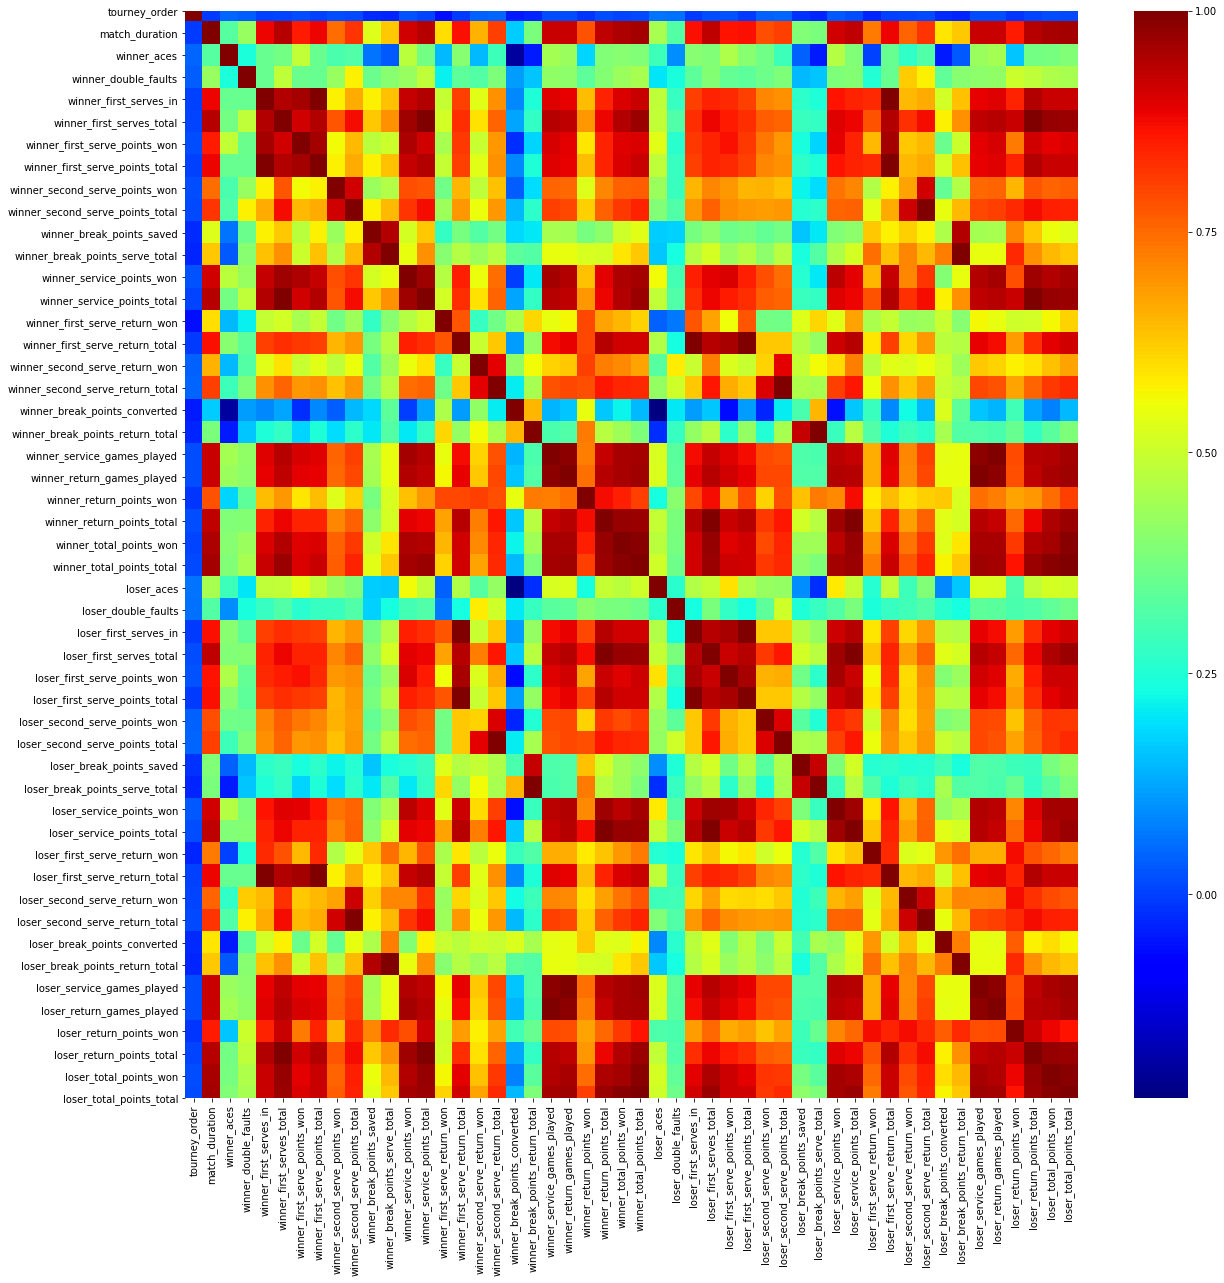

In [16]:
df_numeric = match_stats._get_numeric_data()
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_numeric.corr(),cmap="jet")



We can observe an correlation between winner_first_serves_in and winner_first_serves_point.

In [17]:
def make_scatter(x,y):
    sns.lmplot(data = df_numeric, x = x, y = y) 
_= interact(make_scatter, x = df_numeric, y = df_numeric)

interactive(children=(Dropdown(description='x', options=('tourney_order', 'match_duration', 'winner_aces', 'wi…

# Merging the two Dataset

In [18]:
df = pd.merge(match_scores,match_stats, on ='match_id')


In [19]:
df.head()

,tourney_year_id,tourney_order_x,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Finals,1,1,Grigor Dimitrov,d875,grigor-dimitrov,...,13,25,2,7,12,13,24,77,69,146
1,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,1,Grigor Dimitrov,d875,grigor-dimitrov,...,4,22,0,0,10,10,13,58,53,119
2,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,2,Kei Nishikori,n552,kei-nishikori,...,7,21,1,5,10,11,26,77,63,138
3,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Quarter-Finals,3,1,Milos Raonic,r975,milos-raonic,...,19,35,1,7,14,15,31,97,84,181
4,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Quarter-Finals,3,2,Stan Wawrinka,w367,stan-wawrinka,...,24,52,2,13,16,16,44,119,107,216


## Aqui visualizo las estadisticas de los jugadores

In [20]:
def player_stats(player):
    try:
        player_stats_winner = df[df['winner_name']== player]

        player_stats_loser = df[df['loser_name']== player]

        win = player_stats_winner.groupby('winner_name').sum()    
        lose = player_stats_loser.groupby('loser_name').sum() 

        total_sets_won = win['winner_sets_won'] + lose['loser_sets_won'] 
        total_sets_lose = lose['winner_sets_won'] + win['loser_sets_won']



        total_games_won = win['winner_games_won'] + lose['loser_games_won']
        total_games_lose = lose['winner_games_won'] + win['loser_games_won']

        total_aces = win['winner_aces'] + lose['loser_aces']
        total_first_serves_in = win['winner_first_serves_in'] + lose['loser_first_serves_in']
        total_first_serves = win['winner_first_serves_total'] + lose['loser_first_serves_total']

        fig = go.Figure(data=[go.Bar(x=['total_sets_won',
                                        'total_sets_lose',
                                        'total_games_won',
                                        'total_games_lose',
                                       'total_aces',
                                       'total_first_serves_in',
                                       'total_first_serves'],
                                     y=[int(total_sets_won),
                                        int(total_sets_lose),
                                        int(total_games_won),
                                        int(total_games_lose),
                                       int(total_aces),
                                       int(total_first_serves_in),
                                       int(total_first_serves)])])
        fig.show()
    except TypeError:
        print("Esperando un nombre...")

_= interact(player_stats, player='')

interactive(children=(Text(value='', description='player'), Output()), _dom_classes=('widget-interact',))